In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_Dataset.csv', parse_dates=['Order Date', 'Ship Date'])
df.set_index('Order Date', inplace=True)
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2018-12-30,646,CA-2018-126221,2019-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
2018-12-30,907,CA-2018-143259,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
2018-12-30,908,CA-2018-143259,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
2018-12-30,909,CA-2018-143259,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
2018-12-30,1297,CA-2018-115427,2019-03-01,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904


In [3]:
df.index.min(), df.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2018-12-30 00:00:00'))

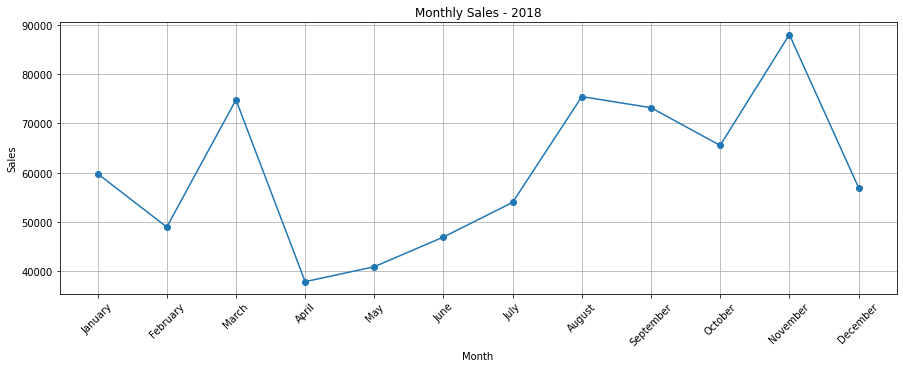

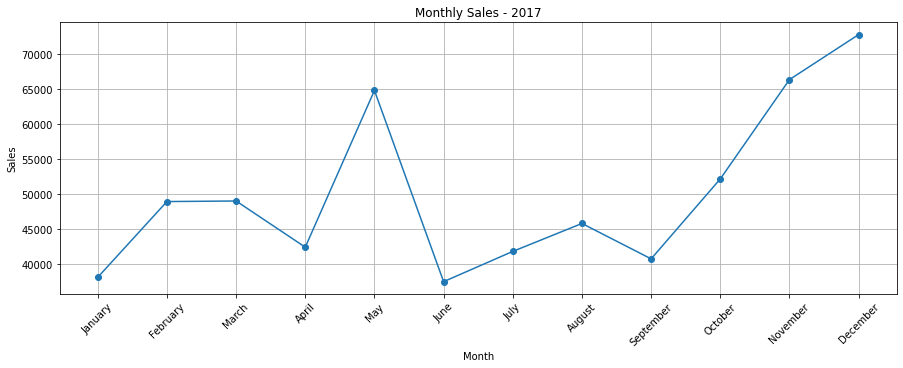

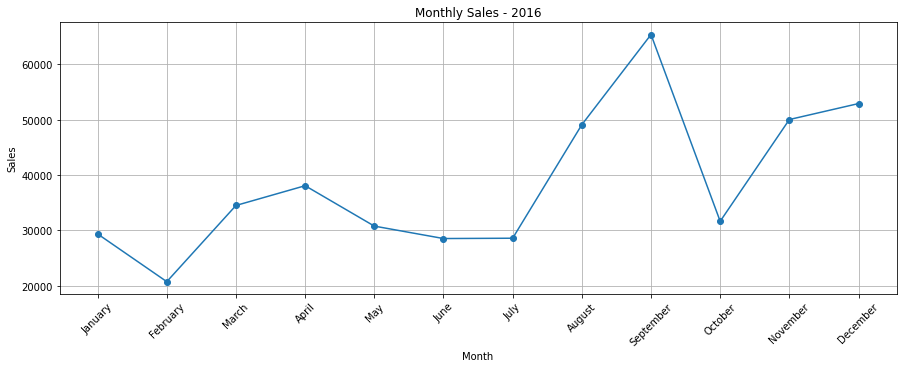

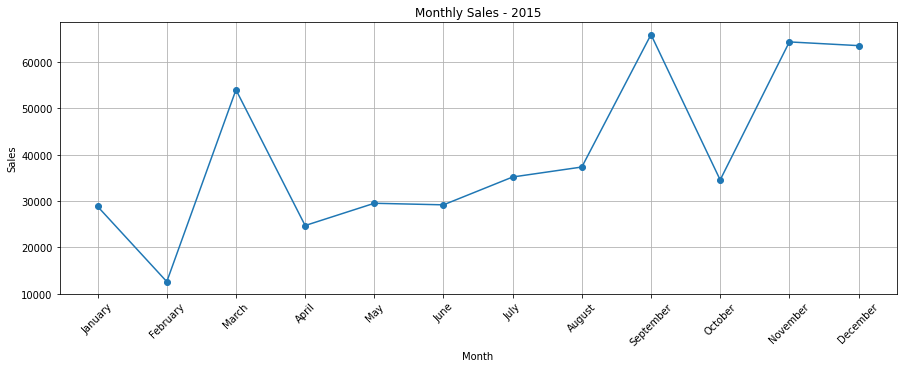

In [4]:
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

# Get unique years
years = df['Year'].unique()

for year in years:
    # Filter data for the year
    df_year = df[df['Year'] == year]
    
    # Group by month and sum sales
    monthly_sales = df_year.groupby('Month')['Sales'].sum()
    
    # Ensure months are in calendar order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_sales = monthly_sales.reindex(month_order)
    
    # Plot
    plt.figure(figsize=(15, 5))
    monthly_sales.plot(kind='line', marker='o')
    plt.title(f'Monthly Sales - {year}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.xticks(range(12), month_order, rotation=45)
    plt.show()

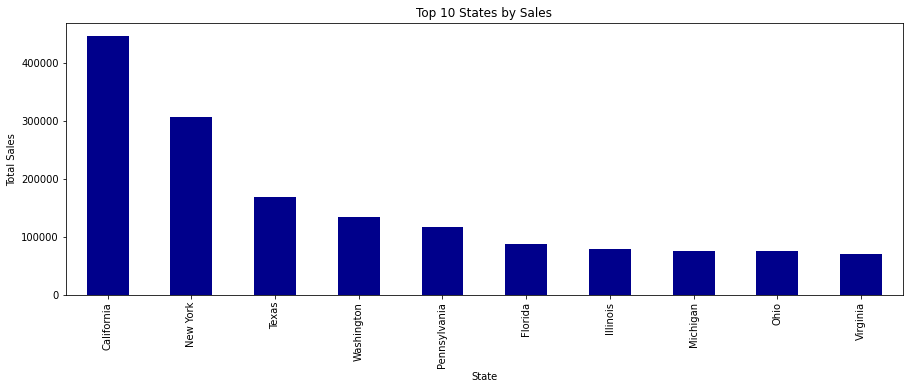

In [5]:
# Get top 10 states by total sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
state_sales.plot(kind='bar', figsize=(15, 5), color='darkblue')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

In [6]:
print(state_sales)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


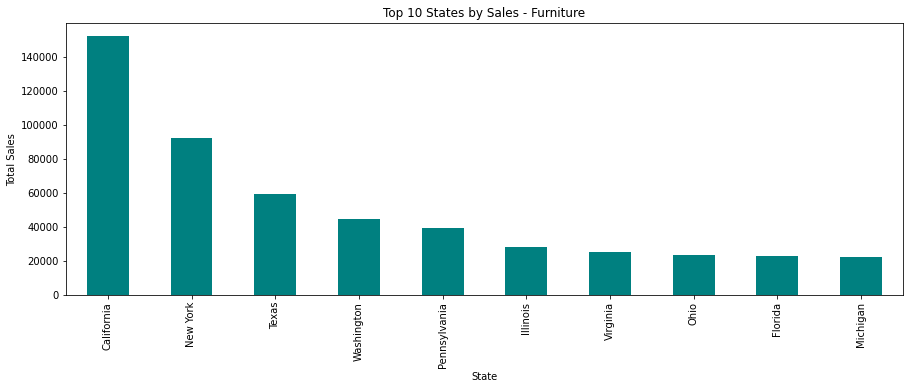

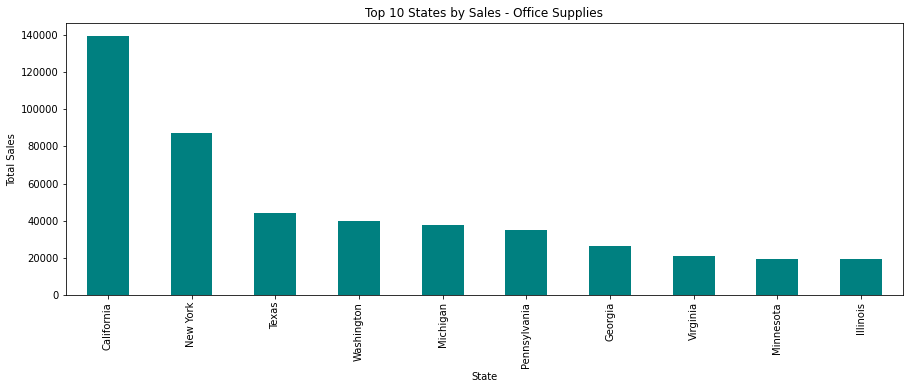

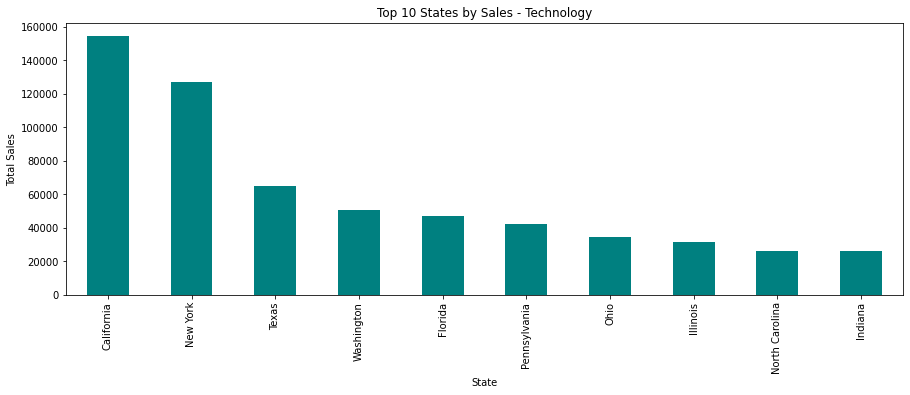

In [7]:
categories = ['Furniture', 'Office Supplies', 'Technology']

for category in categories:
    cat_df = df[df['Category'] == category]
    category_state_sales = cat_df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(15, 5))
    category_state_sales.plot(kind='bar', color='teal')
    plt.title(f'Top 10 States by Sales - {category}')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    plt.show()

In [15]:
#category sales by state
cat_sales = df.groupby(['Category', 'State'])['Sales'].sum().unstack().fillna(0)
print(cat_sales)

State            Alabama    Arizona  Arkansas   California   Colorado  \
Category                                                                
Furniture        6332.48  13525.291   3187.55  152216.5355  13220.285   
Office Supplies  4209.08   9996.481   4565.33  139405.7480   7654.984   
Technology       8969.08  11750.885   3925.25  154684.1800  10966.329   

State            Connecticut   Delaware  District of Columbia    Florida  \
Category                                                                   
Furniture           5174.987   4745.919               1346.58  22743.014   
Office Supplies     5418.340   8014.860                138.52  18725.482   
Technology          2791.030  14562.220               1379.92  46968.036   

State             Georgia  ...  South Dakota  Tennessee       Texas      Utah  \
Category                   ...                                                  
Furniture         8321.48  ...        324.90  13506.732  59633.6442  4822.350   
Office Sup

C:\Users\OWNER\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 10454.65
RMSE: 13817.40
MAPE: 21.06%


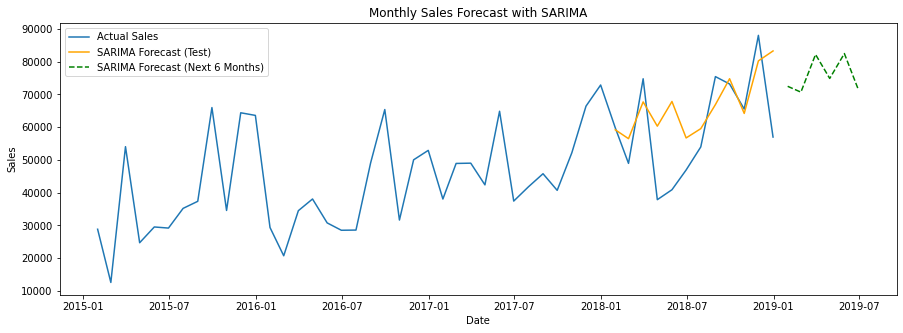

In [8]:
# SARIMA Time Series Forecasting for Sales
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Aggregate sales by month
monthly_sales = df['Sales'].resample('M').sum()

# Split data into train and test (last 12 months for testing)
train = monthly_sales[:-12]
test = monthly_sales[-12:]

# Fit SARIMA model (order and seasonal_order can be tuned)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast for test period and next 6 months
forecast_steps = 12 + 6  # 12 for test, 6 for future
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(train), len(train) + forecast_steps)
forecast_values = forecast.predicted_mean

# Evaluation on test set
pred_test = forecast_values[:12]
mae = mean_absolute_error(test, pred_test)
rmse = np.sqrt(mean_squared_error(test, pred_test))
mape = np.mean(np.abs((test - pred_test) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(test.index, pred_test, label='SARIMA Forecast (Test)', color='orange')
plt.plot(forecast_values.index[-6:], forecast_values[-6:], label='SARIMA Forecast (Next 6 Months)', color='green', linestyle='--')
plt.title('Monthly Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

ARIMA MAE: 12654.76
ARIMA RMSE: 14825.86
ARIMA MAPE: 22.72%


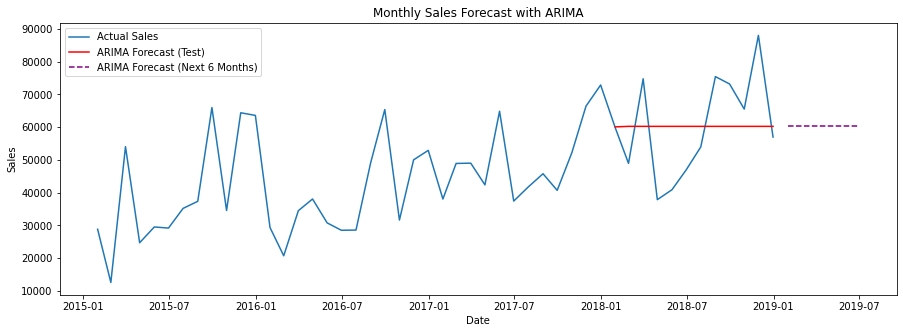

In [9]:
# ARIMA Time Series Forecasting for Sales
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order can be tuned)
arima_model = ARIMA(train, order=(1,1,1))
arima_results = arima_model.fit()

# Forecast for test period and next 6 months
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
arima_forecast_values = arima_forecast.predicted_mean

# Evaluation on test set
arima_pred_test = arima_forecast_values[:12]
arima_mae = mean_absolute_error(test, arima_pred_test)
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred_test))
arima_mape = np.mean(np.abs((test - arima_pred_test) / test)) * 100

print(f"ARIMA MAE: {arima_mae:.2f}")
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ARIMA MAPE: {arima_mape:.2f}%")

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(test.index, arima_pred_test, label='ARIMA Forecast (Test)', color='red')
plt.plot(arima_forecast_values.index[-6:], arima_forecast_values[-6:], label='ARIMA Forecast (Next 6 Months)', color='purple', linestyle='--')
plt.title('Monthly Sales Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\OWNER\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
06:51:28 - cmdstanpy - INFO - Chain [1] start processing
06:51:28 - cmdstanpy - INFO - Chain [1] start processing
06:51:28 - cmdstanpy - INFO - Chain [1] done processing
06:51:28 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE: 12470.60
Prophet RMSE: 13759.65
Prophet MAPE: 20.69%


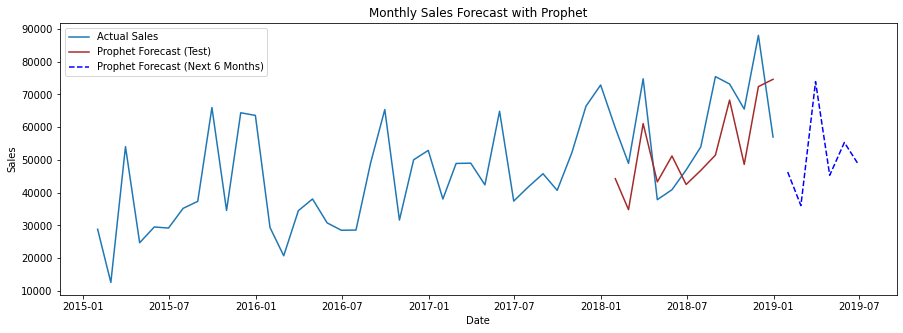

In [10]:
# Prophet Time Series Forecasting for Sales
from prophet import Prophet

# Prepare data for Prophet
df_prophet = monthly_sales.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Split data into train and test (last 12 months for testing)
train_prophet = df_prophet.iloc[:-12]
test_prophet = df_prophet.iloc[-12:]

# Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Create future dataframe for test + next 6 months
future_periods = 12 + 6
future = prophet_model.make_future_dataframe(periods=future_periods, freq='M')
forecast = prophet_model.predict(future)

# Evaluation on test set
prophet_pred_test = forecast['yhat'].iloc[-(future_periods):-(future_periods-12)].values
prophet_mae = mean_absolute_error(test_prophet['y'], prophet_pred_test)
prophet_rmse = np.sqrt(mean_squared_error(test_prophet['y'], prophet_pred_test))
prophet_mape = np.mean(np.abs((test_prophet['y'] - prophet_pred_test) / test_prophet['y'])) * 100

print(f"Prophet MAE: {prophet_mae:.2f}")
print(f"Prophet RMSE: {prophet_rmse:.2f}")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sales')
plt.plot(test_prophet['ds'], prophet_pred_test, label='Prophet Forecast (Test)', color='brown')
plt.plot(forecast['ds'].iloc[-6:], forecast['yhat'].iloc[-6:], label='Prophet Forecast (Next 6 Months)', color='blue', linestyle='--')
plt.title('Monthly Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\OWNER\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing MAE: 14919.38
Exponential Smoothing RMSE: 16782.07
Exponential Smoothing MAPE: 24.52%


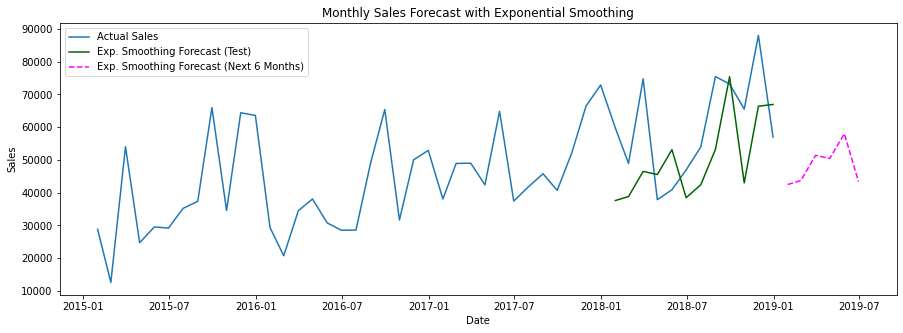

In [11]:
# Exponential Smoothing Time Series Forecasting for Sales
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (additive trend and seasonality)
exp_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
exp_results = exp_model.fit()

# Forecast for test period and next 6 months
exp_forecast = exp_results.forecast(steps=forecast_steps)

# Evaluation on test set
exp_pred_test = exp_forecast[:12]
exp_mae = mean_absolute_error(test, exp_pred_test)
exp_rmse = np.sqrt(mean_squared_error(test, exp_pred_test))
exp_mape = np.mean(np.abs((test - exp_pred_test) / test)) * 100

print(f"Exponential Smoothing MAE: {exp_mae:.2f}")
print(f"Exponential Smoothing RMSE: {exp_rmse:.2f}")
print(f"Exponential Smoothing MAPE: {exp_mape:.2f}%")

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(test.index, exp_pred_test, label='Exp. Smoothing Forecast (Test)', color='darkgreen')
plt.plot(exp_forecast.index[-6:], exp_forecast[-6:], label='Exp. Smoothing Forecast (Next 6 Months)', color='magenta', linestyle='--')
plt.title('Monthly Sales Forecast with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [12]:
# Save/download the four different models
import joblib
import pickle

# Save SARIMA model
joblib.dump(results, 'sarima_model.pkl')

# Save ARIMA model
joblib.dump(arima_results, 'arima_model.pkl')

# Save Prophet model (using pickle)
pickle.dump(prophet_model, open('prophet_model.pkl', 'wb'))

# Save Exponential Smoothing model
joblib.dump(exp_results, 'exp_smoothing_model.pkl')

print("Models saved: sarima_model.pkl, arima_model.pkl, prophet_model.pkl, exp_smoothing_model.pkl")

Models saved: sarima_model.pkl, arima_model.pkl, prophet_model.pkl, exp_smoothing_model.pkl
